# Clustering Algorithms
This notebook will demonstrate use and accuracy of the clustering algorithms as implemented in this repo. These algorithms include K-Means, DBSCAN, and Hierarchical Clustering.

In [31]:
# Fix project root
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Import dependencies, utilities, algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from ml_algs.unsupervised.kmeans import KMeans
from ml_algs.unsupervised.dbscan import DBSCAN
from ml_algs.unsupervised.hierarchical import HierarchicalClustering


Now, all of the necessary packages have been loaded. However, for this notebook, I will not be using a real dataset. Instead, I will use Sklearn to generate two synthetic datasets for clustering. One will have fairly straightforward and circular clusters. The other will have more strangely shaped clusters. They will be generated and shown below

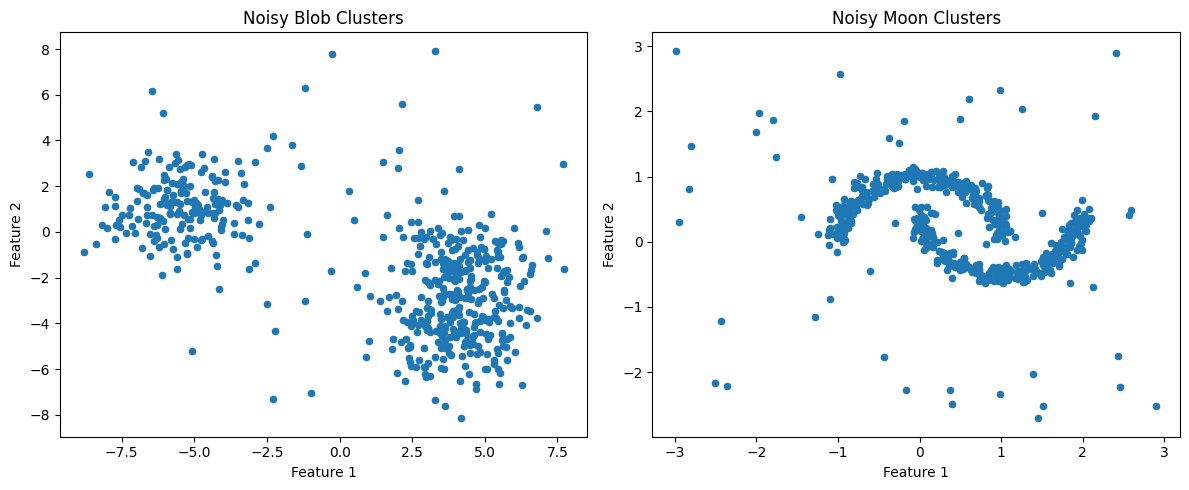

In [32]:
X_blobs, y_blobs = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=1.2,
    random_state=123
)
rng = np.random.RandomState(123)
noise_blobs = rng.uniform(low=-8, high=8, size=(50, 2))
X_blobs_noisy = np.vstack([X_blobs, noise_blobs])

X_moons, y_moons = make_moons(
    n_samples=500,
    noise=0.08,
    random_state=123
)
noise_moons = rng.uniform(low=-3, high=3, size=(50, 2))
X_moons_noisy = np.vstack([X_moons, noise_moons])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(
    X_blobs_noisy[:, 0],
    X_blobs_noisy[:, 1],
    s=20
)
axes[0].set_title("Noisy Blob Clusters")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

axes[1].scatter(
    X_moons_noisy[:, 0],
    X_moons_noisy[:, 1],
    s=20
)
axes[1].set_title("Noisy Moon Clusters")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

These two datasets will be what we use to demonstrate our clustering algorithms. I will now run both datasets through each of the three clustering algorithms and display the results.

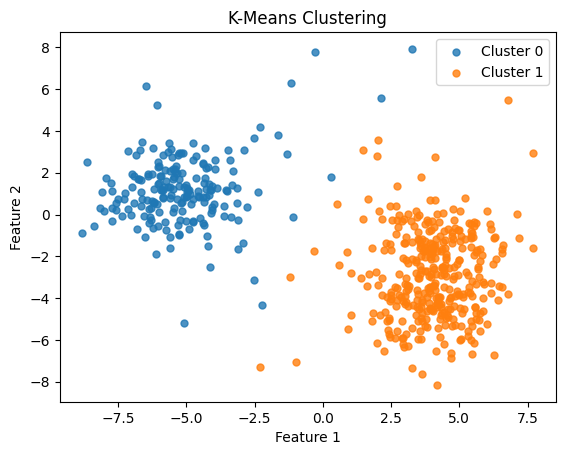

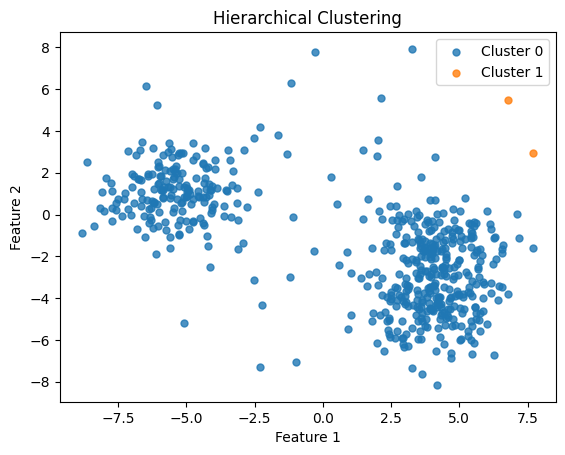

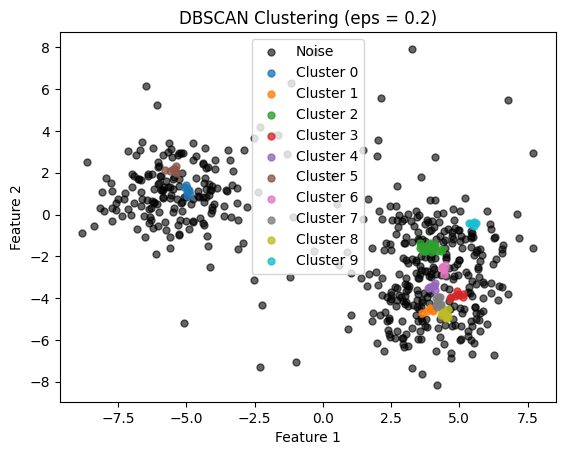

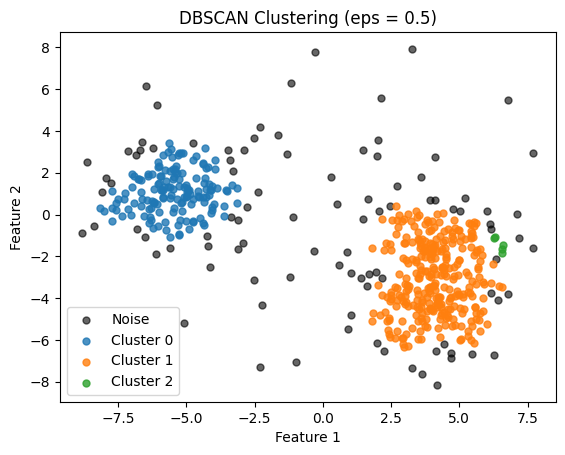

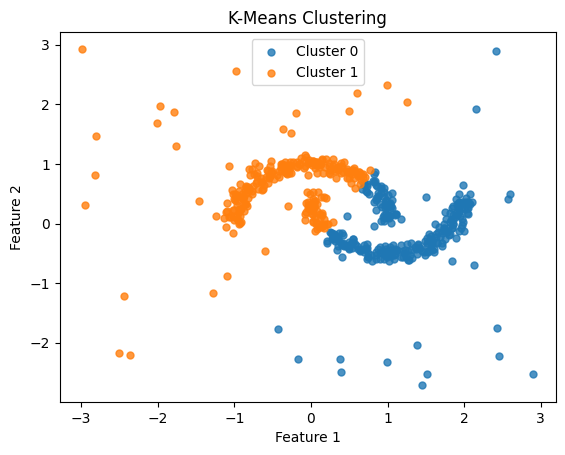

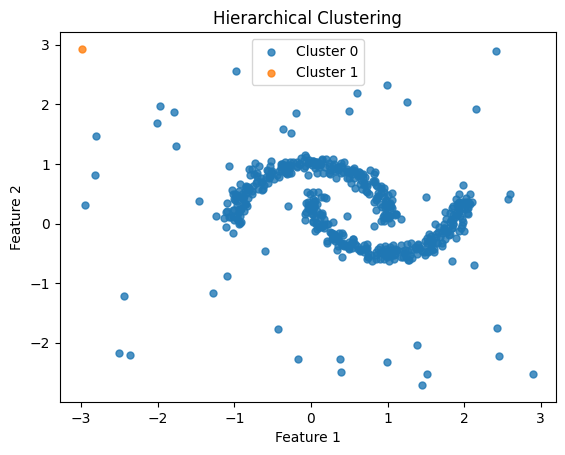

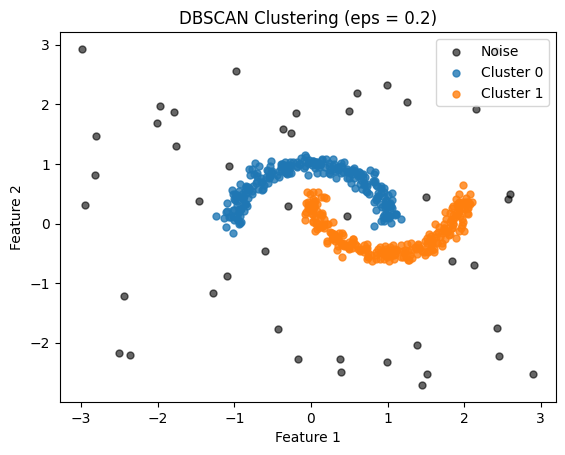

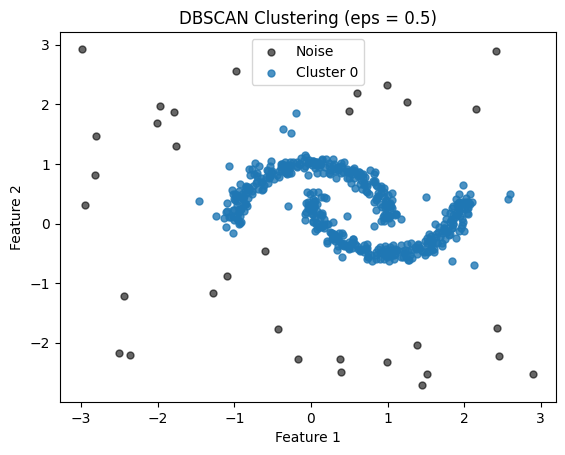

In [33]:
def plot_clusters(X, labels, title):
    """
    Plots clustering results.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, 2)
        2D data to plot
    labels : array-like
        Cluster labels (-1 used for noise)
    title : str
        Plot title
    """
    labels = np.array(labels)
    unique_labels = np.unique(labels)

    for label in unique_labels:
        mask = labels == label

        if label == -1:
            plt.scatter(
                X[mask, 0],
                X[mask, 1],
                c="black",
                s=25,
                alpha=0.6,
                label="Noise"
            )
        else:
            plt.scatter(
                X[mask, 0],
                X[mask, 1],
                s=25,
                alpha=0.8,
                label=f"Cluster {label}"
            )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

def plotall(X):
    kmeans = KMeans(k=2, max_iters=100)
    kmeans.fit(X)
    labels_kmeans = kmeans.predict(X)
    plot_clusters(X, labels_kmeans, "K-Means Clustering")


    hier = HierarchicalClustering(n_clusters=2)
    hier.fit(X)
    labels_hier = hier.predict(X)
    plot_clusters(X, labels_hier, "Hierarchical Clustering")

    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(X)
    labels_dbscan = dbscan.predict(X)
    plot_clusters(X, labels_dbscan, "DBSCAN Clustering (eps = 0.2)")

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan.fit(X)
    labels_dbscan = dbscan.predict(X)
    plot_clusters(X, labels_dbscan, "DBSCAN Clustering (eps = 0.5)")

plotall(X_blobs_noisy)
plotall(X_moons_noisy)

The above graphs are quite informative of how the implemented algorithms work. K-Means had a very strong performance in the blobs dataset, making a very clean looking partition of the the data. However, when faced with the moons dataset, it did not quite separate the two crescents into different clusters. The boundary between the two aligns more with making circular clusters, which K-Means tries to do. The Hierarchical Clustering model put almost every point in the same cluster. This is because it uses single linkage, which accepts points into a cluster by distance from the closest point in the cluster. With a lot of noise, it tended to make one large cluster. DBSCAN has perhaps the most interesting performance of all. This model requires more thoughtful hyperparameter tuning than the others. Whereas, for the other two models, I can simply look at the data and say "yeah, it looks like there are two clusters" and set the n_clusters parameter to 2, DBSCAN requires an epsilon that represents the maximum distance of points considered "neighbors." When using epsilon = 0.2 on the blobs dataset, the points were not close enough together, and numerous clusters were formed, contrary to the clear structure of the data. In most cases, this is not ideal. However, when using epsilon = 0.5, a more typically desirable result is attained. However, the opposite is true on the moon dataset. An epsilon of 0.5 accepts both moons into the same cluster, which is unlikely to be the desired result, whereas an epsilon of 0.2 forms tight, proper clusters that correctly reject a lot of points as noise.